In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados.shape

(127380, 136)

In [ ]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

## Proporção dos inscritos por idade

In [ ]:
dados.NU_IDADE.value_counts(normalize=True, ascending=True, bins = [13,17,22,27,32,37,42,47,52,57,62,67,72,82]).sort_index()

(12.999, 17.0]    0.245250
(17.0, 22.0]      0.466902
(22.0, 27.0]      0.130044
(27.0, 32.0]      0.062396
(32.0, 37.0]      0.038538
(37.0, 42.0]      0.024855
(42.0, 47.0]      0.014602
(47.0, 52.0]      0.009083
(52.0, 57.0]      0.004993
(57.0, 62.0]      0.002025
(62.0, 67.0]      0.000926
(67.0, 72.0]      0.000330
(72.0, 82.0]      0.000055
Name: NU_IDADE, dtype: float64

## Estados dos participantes com 13 anos

In [ ]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts().sort_index()

AP    1
BA    1
MT    1
SP    1
Name: SG_UF_RESIDENCIA, dtype: int64

## Histograma notas de LC com título

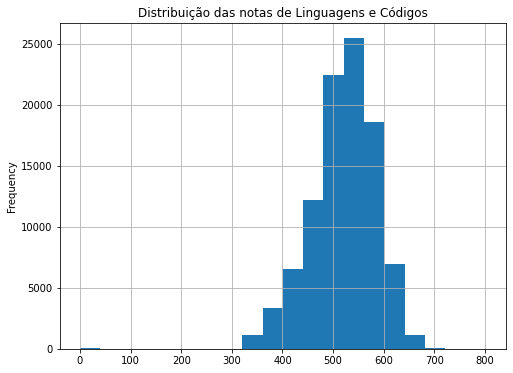

In [ ]:
dados["NU_NOTA_LC"].plot(kind='hist',bins=20, grid='True',figsize=(8, 6), title='Distribuição das notas de Linguagens e Códigos')

## Histograma com distribuição da idade de treineiros e não treineiros

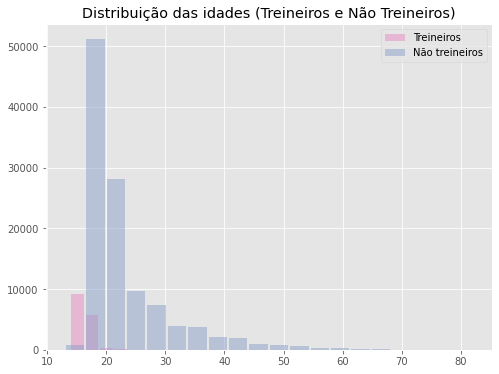

In [ ]:
trei = dados['IN_TREINEIRO'] == 1

ntrei = dados['IN_TREINEIRO'] == 0

plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.title('Distribuição das idades (Treineiros e Não Treineiros)')


plt.hist(dados['NU_IDADE'][trei],color='#e78ac3',rwidth=0.9,alpha=0.5,bins=20,label='Treineiros')

plt.hist(dados['NU_IDADE'][ntrei],color='#8da0cb',rwidth=0.9,alpha=0.5,bins=20,label='Não treineiros')

plt.legend(loc='upper right')


## Comparação das distribuições das provas de Inglês Espanhol

In [ ]:
aux = dados[['TP_LINGUA', 'NU_NOTA_LC']]

aux.loc[aux.TP_LINGUA == 0,'TP_LINGUA']='Inglês'
aux.loc[aux.TP_LINGUA == 1,'TP_LINGUA']='Espanhol'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


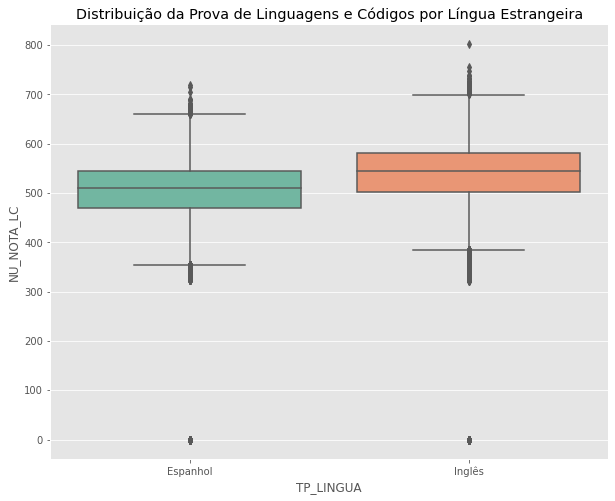

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Linguagens e Códigos por Língua Estrangeira')
sns.boxplot(x=aux['TP_LINGUA'], y=aux['NU_NOTA_LC'], palette="Set2")

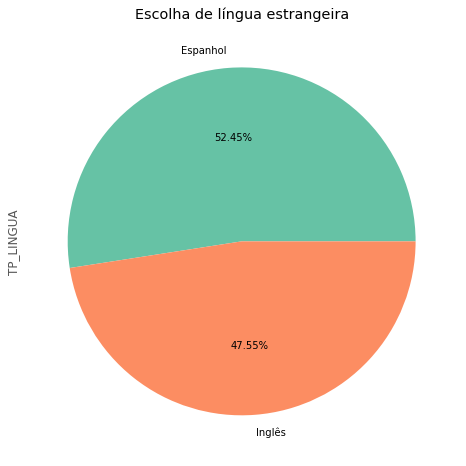

In [ ]:
colors = ['#66c2a5', '#fc8d62']
la = ['Espanhol', 'Inglês']
a = dados.TP_LINGUA.value_counts().plot(kind='pie', autopct='%1.2f%%',title = 'Escolha de língua estrangeira', colors = colors, labels = la, figsize=(10,8))

In [ ]:
pal = sns.color_palette("Set2")
print(pal.as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


## Ensino Médio

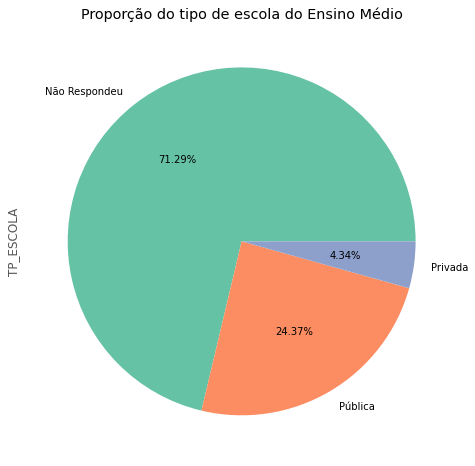

In [ ]:
la = ['Não Respondeu','Pública','Privada','Exterior']
dados.TP_ESCOLA.value_counts().plot(kind='pie', autopct='%1.2f%%',title = 'Proporção do tipo de escola do Ensino Médio', labels = la ,colors = pal.as_hex(), figsize=(10,8))

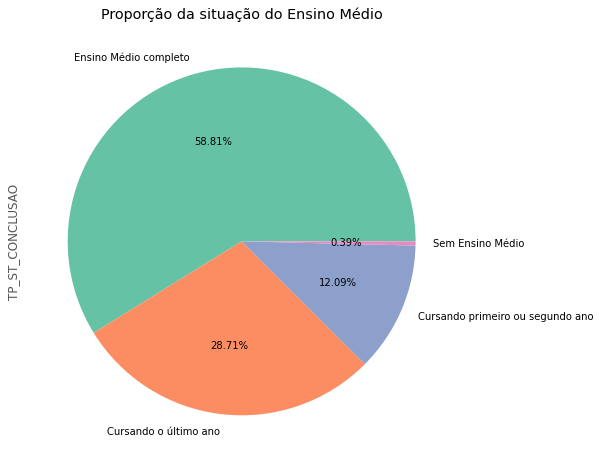

In [ ]:
la = ['Ensino Médio completo','Cursando o último ano','Cursando primeiro ou segundo ano','Sem Ensino Médio']
dados.TP_ST_CONCLUSAO.value_counts().plot(kind='pie', autopct='%1.2f%%',title = 'Proporção da situação do Ensino Médio', labels = la ,colors = pal.as_hex(), figsize=(10,8))

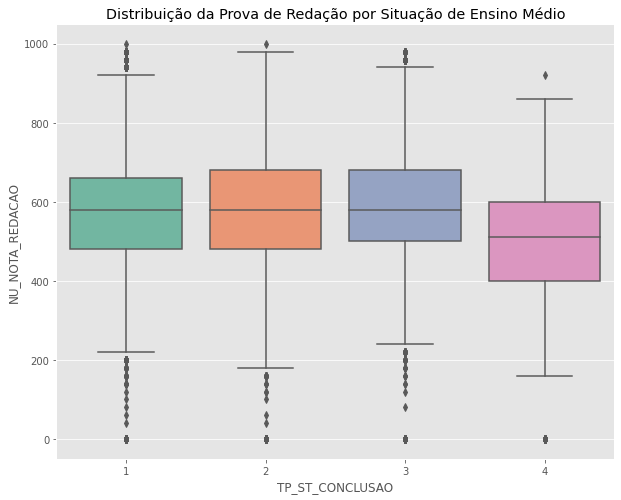

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Redação por Situação de Ensino Médio')
a = sns.boxplot(x=dados['TP_ST_CONCLUSAO'],y=dados['NU_NOTA_REDACAO'], palette="Set2")

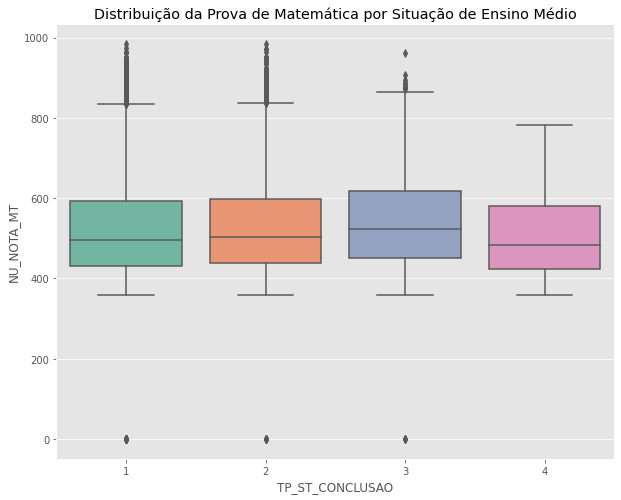

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Matemática por Situação de Ensino Médio')
sns.boxplot(x=dados['TP_ST_CONCLUSAO'], y=dados['NU_NOTA_MT'], palette="Set2")

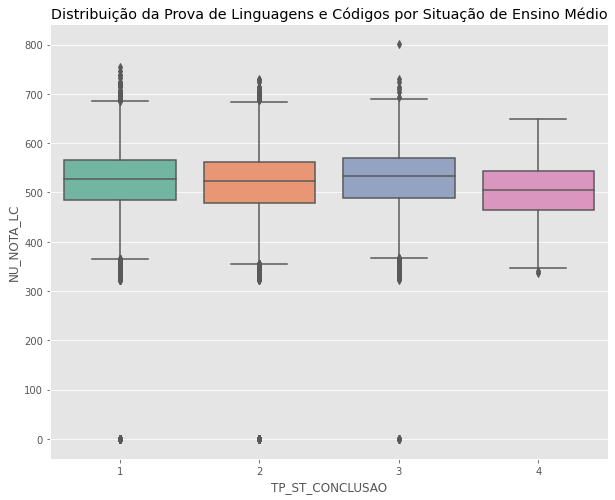

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Linguagens e Códigos por Situação de Ensino Médio')
sns.boxplot(x=dados['TP_ST_CONCLUSAO'], y=dados['NU_NOTA_LC'], palette="Set2")

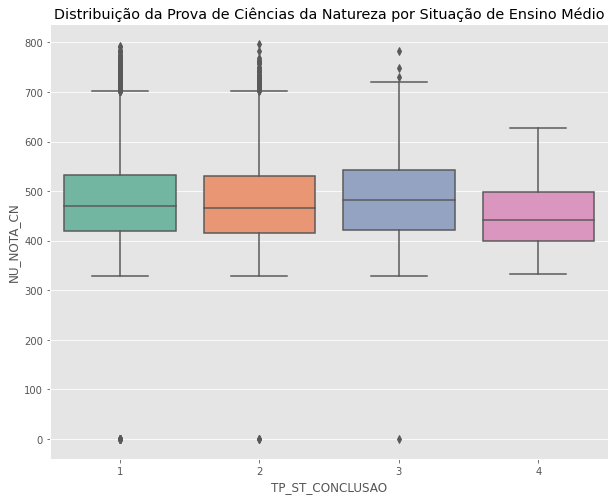

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Ciências da Natureza por Situação de Ensino Médio')
sns.boxplot(x=dados['TP_ST_CONCLUSAO'], y=dados['NU_NOTA_CN'], palette="Set2")

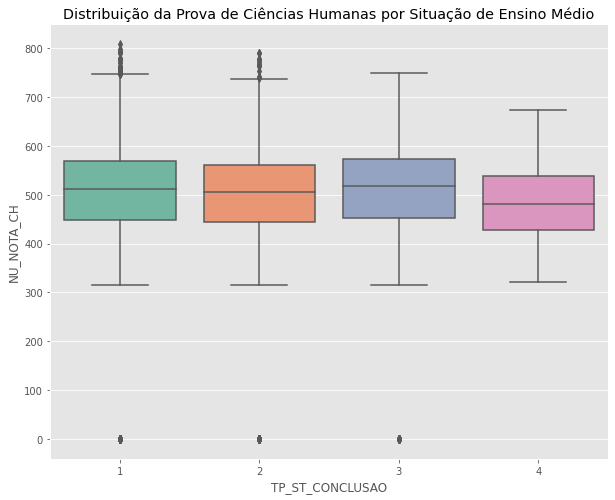

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Ciências Humanas por Situação de Ensino Médio')
sns.boxplot(x=dados['TP_ST_CONCLUSAO'], y=dados['NU_NOTA_CH'], palette="Set2")

## Distribuição por provas

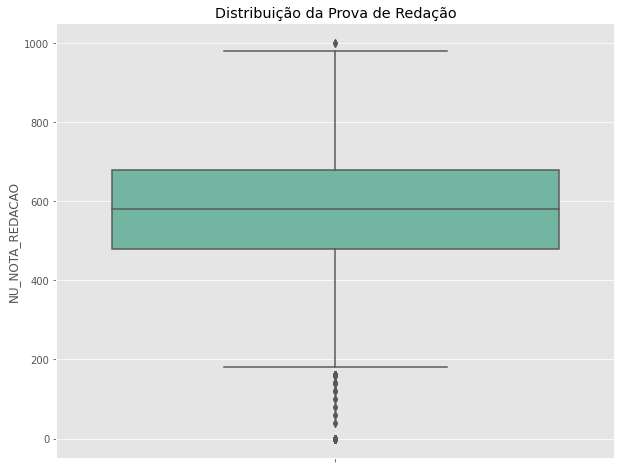

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribuição da Prova de Redação')
sns.boxplot(y=dados['NU_NOTA_REDACAO'], palette="Set2")